In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
plt.style.use(['ggplot'])

In [2]:
dataset = pd.read_csv(r'Dataset/position/TrainingData.csv')
dataset.head()
dataset.tail()
# sns.pairplot(dataset)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049
19936,100,100,100,100,100,100,100,100,100,100,...,100,-7536.1658,4.864898e+06,3,1,112,2,18,10,1371711025


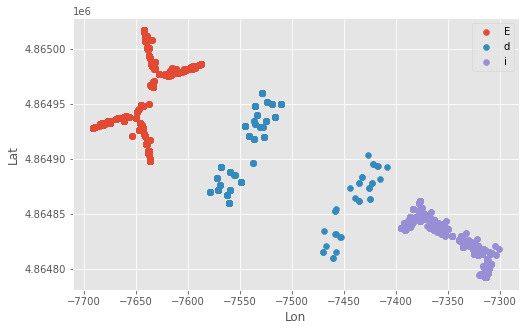

In [3]:
dataset.head()
dataset.tail()
dataset.isnull().values.any()
dataset.dropna()
y=dataset.iloc[7000:10000,-6].values
X=dataset.iloc[7000:10000,[-9,-8]].values

fig, ax = plt.subplots(figsize=(8,5))
for i in range(3):
    ax.scatter(X[y==i,0],X[y==i,1])
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.legend('Edificio')
plt.show()

In [4]:
#### Preprocesing
onehot_encoder = OneHotEncoder(sparse=False)
y = y.reshape(len(y), 1)
y_ohe= onehot_encoder.fit_transform(y)
# X_b = np.c_[np.ones((X.shape[0],1)),X]

x_b = np.c_[np.ones((len(X),1)),X]
nf,nc=x_b.shape
x_bs=x_b
for it in range(1,nc):
    m=np.mean(x_b[:,it])
    std=np.std(x_b[:,it])
    x_bs[:,it]=(x_b[:,it]-m)/std


#### setup and initial values
alpha=1e-4
Theta=np.zeros((y_ohe.shape[1]-1, X.shape[1]+1))
ite=1000

In [5]:
def hipotesis_rl(X,Theta):
    val=np.exp(Theta @ X.T)
    suma=np.sum(val,axis=0)+np.ones((X.shape[0]))
    val=val/suma  
    return val

In [6]:
for i in range(ite):
    h=hipotesis_rl(x_bs,Theta).T
    grad=(h-y_ohe[:,0:2]).T@x_bs
    Theta=Theta-alpha*grad
h=np.concatenate((h,(1-np.sum(h,axis=1)).reshape(len(h),1)),axis=1)
# assig=np.argmax(h,axis=1)
# for a,b in zip(assig,y): 
#     print(a, b)

In [7]:
%matplotlib qt

xc = np.arange(np.min(x_bs[:,1]), np.max(x_bs[:,1]), 0.01)
yc = np.arange(np.min(x_bs[:,2]), np.max(x_bs[:,2]), 0.01)
plane=np.zeros([len(xc),len(yc),2])


for i in range(len(xc)):
    for j in range(len(yc)):
        plane[i,j,:]=hipotesis_rl(np.c_[1,xc[i],yc[j]],Theta).reshape(2,)
B, M = np.meshgrid(yc, xc)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(B,M, plane[:,:,0],
                        linewidth=0, antialiased=False)
surf = ax.plot_surface(B,M, plane[:,:,1],
                        linewidth=0, antialiased=False)
surf = ax.plot_surface(B,M, 1-plane[:,:,0]-plane[:,:,1],
                        linewidth=0, antialiased=False)
ax.scatter(x_bs[:,2], x_bs[:,1], y, c='r', marker='o')
ax.set_xlabel('Lon',fontsize=12)
ax.set_ylabel('Lat',fontsize=12)
ax.set_zlabel('Edificio',fontsize=12)

Text(0.5, 0, 'Edificio')